### Import Library

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [160]:
df = pd.read_csv("../dataset/winequality-red.csv")

### Tampilkan 10 data teratas

In [161]:
print("== 10 Data Teratas ==")
df.head(10)

== 10 Data Teratas ==


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Pemeriksaan Struktur Awal Data (EDA)

In [162]:
# Shape dataset
print("\n== Shape Dataset ==")
df.shape


== Shape Dataset ==


(1599, 12)

In [136]:
# Info umum dataset
print("\n== Info Dataset ==")
df.info()


== Info Dataset ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [163]:
# Statistik deskriptif
print("\n== Statistik Deskriptif ==")
df.describe()


== Statistik Deskriptif ==


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
# Cek missing values
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Visualisasi sebaran data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2372\674259854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


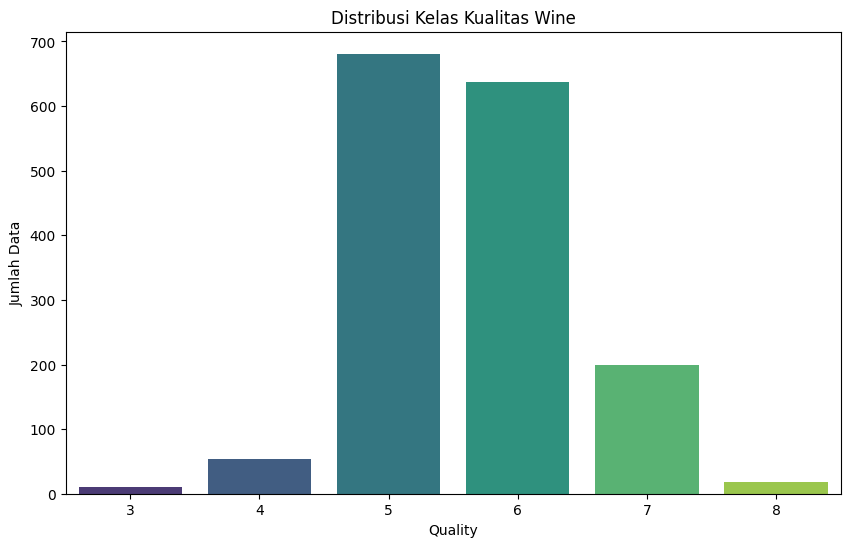

In [164]:
# Visualisasi distribusi kelas kualitas wine
plt.figure(figsize=(10, 6))
sns.countplot(x="quality", data=df, palette="viridis")
plt.xlabel("Quality")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas Kualitas Wine")
plt.show()


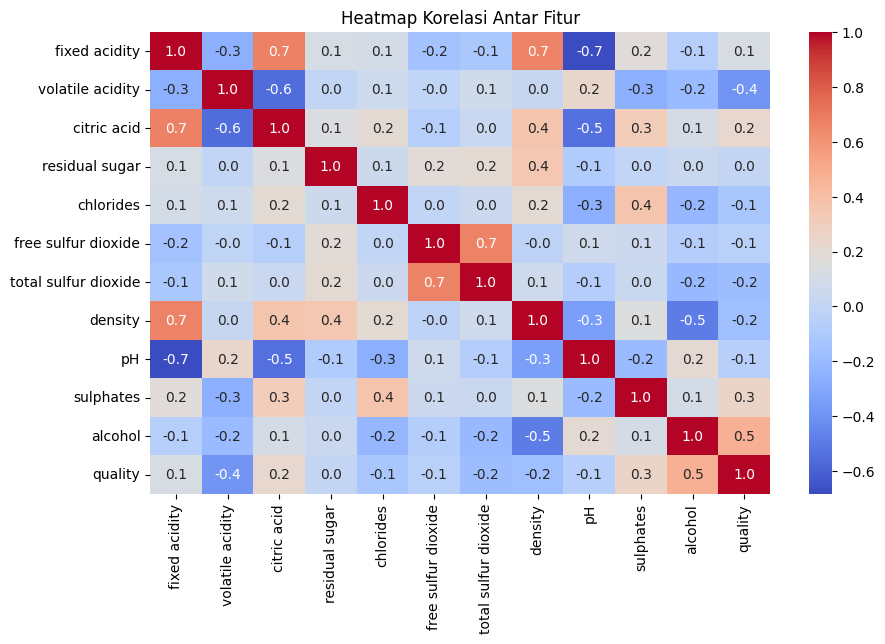

In [165]:
# Matriks korelasi
corr_matrix = df.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


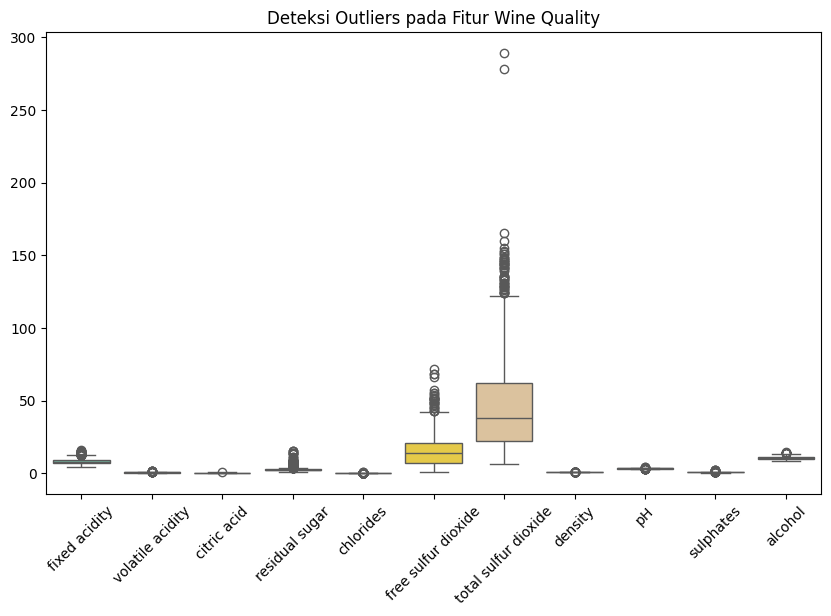

In [166]:
# Visualisasi Outliers dengan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('quality', axis=1), palette="Set2")
plt.xticks(rotation=45)
plt.title("Deteksi Outliers pada Fitur Wine Quality")
plt.show()

### Pemisahan fitur dan target

In [167]:
# Pisahkan fitur dan target
x = df.drop("quality", axis=1)
y = df["quality"]

# Cek dimensi data 
print("Fitur (X):", x.shape)
print("Target (y):", y.shape)

Fitur (X): (1599, 11)
Target (y): (1599,)


In [168]:
# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Data latih:", x_train.shape)
print("Data uji:", x_test.shape)

Data latih: (1279, 11)
Data uji: (320, 11)


In [169]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform data latih
x_train_scaled = scaler.fit_transform(x_train)

# Transform data uji
x_test_scaled = scaler.transform(x_test)

### Implementasi Model Klasifikasi

#### Model 1 : Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi dan train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_scaled, y_train)

# Prediksi pada data uji
y_pred_lr = log_reg.predict(x_test_scaled)

In [146]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred_lr)

print("== Logistic Regression Performance ==")
print(f"\nModel: Logistic Regression")
print(f"Accuracy:", f"{acc: .4f} ({acc * 100: .2f} %)")
print(classification_report(y_test, y_pred_lr))

== Logistic Regression Performance ==

Model: Logistic Regression
Accuracy:  0.5906 ( 59.06 %)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       136
           6       0.54      0.61      0.57       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.57      0.59      0.57       320



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

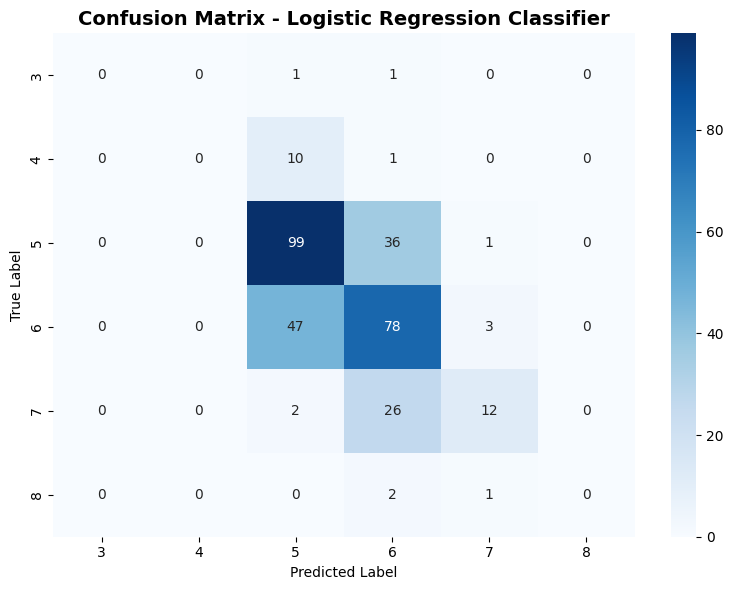

In [171]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=log_reg.classes_)

# Plotting 
plt.figure(figsize=(8, 6))

sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=log_reg.classes_,
    yticklabels=log_reg.classes_
)

plt.title("Confusion Matrix - Logistic Regression Classifier", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


#### Model 2 : K-Nearest Neighbors (KNN)

In [148]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi dan train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

# Prediksi pada data uji
y_pred_knn = knn.predict(x_test_scaled)

In [172]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred_knn)

print("== K-Nearest Neighbors Performance ==")
print(f"\nModel: K-Nearest Neighbors")
print(f"Accuracy:", f"{acc: .4f} ({acc * 100: .2f} %)")
print(classification_report(y_test, y_pred_knn))

== K-Nearest Neighbors Performance ==

Model: K-Nearest Neighbors
Accuracy:  0.6094 ( 60.94 %)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.68      0.66       136
           6       0.57      0.62      0.59       128
           7       0.64      0.57      0.61        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.58      0.61      0.60       320



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

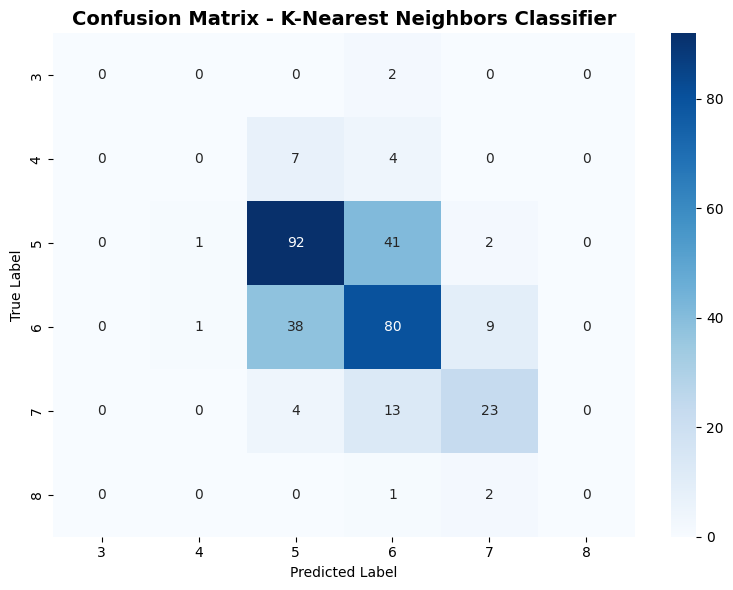

In [173]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

# Plotting 
plt.figure(figsize=(8, 6))

sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=knn.classes_,
    yticklabels=knn.classes_
)

plt.title("Confusion Matrix - K-Nearest Neighbors Classifier", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#### Model 3 : Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Training model
rf.fit(x_train, y_train)

# Prediksi data uji
y_pred_rf = rf.predict(x_test)

In [175]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred_rf)

print("== Random Forest Classifier Performance ==")
print(f"\nModel: Random Forest Classifier")
print(f"Accuracy:", f"{acc: .4f} ({acc * 100: .2f} %)")
print(classification_report(y_test, y_pred_rf))

== Random Forest Classifier Performance ==

Model: Random Forest Classifier
Accuracy:  0.6781 ( 67.81 %)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.65      0.70      0.67       128
           7       0.71      0.55      0.62        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

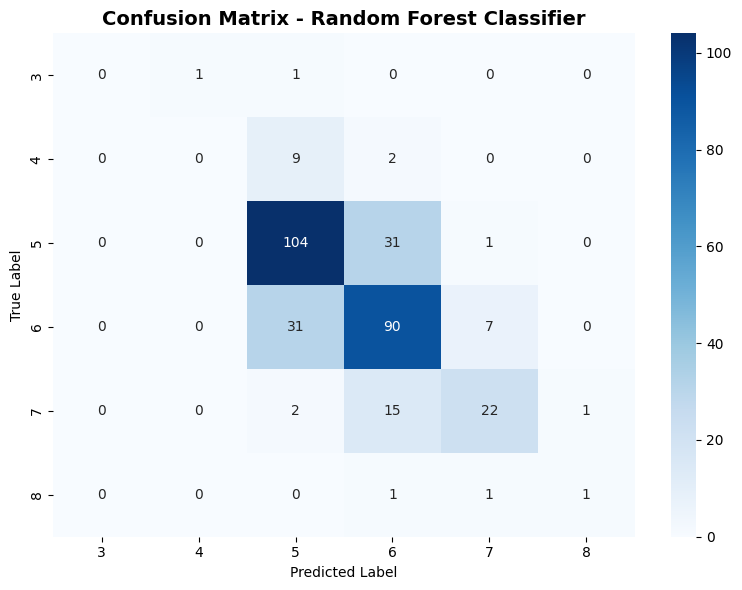

In [186]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)

# Plotting 
plt.figure(figsize=(8, 6))

sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf.classes_,
    yticklabels=rf.classes_
)

plt.title("Confusion Matrix - Random Forest Classifier", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#### Hasil Compare ketiga model

In [177]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf)
    ],
})

comparison

,Model,Accuracy
0,Logistic Regression,0.590625
1,KNN,0.609375
2,Random Forest,0.678125


#### Hyperparameter Tuning menggunakan GridSearchCV

In [187]:
# Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

# Mentukan parameter yang akan dicoba
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5]
}

# Inisialisasi Grid Search pada model Random Forest
rf_tuned = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    cv=5,              
    scoring='accuracy',
    n_jobs=-1,          
    verbose=1
)

# Lakukan training (fitting)
print("Tuning")
grid_search.fit(x_train, y_train)

# Menampilkan hasil terbaik
best_model = grid_search.best_estimator_
print(f"\nParameter Terbaik: {grid_search.best_params_}")
print(f"Akurasi Terbaik dari Cross-Validation: {grid_search.best_score_:.4f}")

tuning
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Parameter Terbaik: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Akurasi Terbaik dari Cross-Validation: 0.6833


#### Evaluasi Model Hasil Tuning

In [180]:
# Evaluasi Model Tuned 

# Prediksi menggunakan model terbaik hasil tuning
y_pred_tuned = best_model.predict(x_test)

acc_tuned = accuracy_score(y_test, y_pred_tuned)

comparison_final = pd.DataFrame({
    "Metode": ["Random Forest (Base)", "Random Forest (Tuned)"],
    "Akurasi": [accuracy_score(y_test, y_pred_rf), acc_tuned],
    "Peningkatan": [0, acc_tuned - accuracy_score(y_test, y_pred_rf)]
})

print("\n== PERBANDINGAN AKHIR ==")
print(comparison_final)

# Menampilkan Classification Report 
print("\n== Classification Report (Tuned Model) ==")
print(classification_report(y_test, y_pred_tuned))


== PERBANDINGAN AKHIR ==
                  Metode   Akurasi  Peningkatan
0   Random Forest (Base)  0.678125     0.000000
1  Random Forest (Tuned)  0.681250     0.003125

== Classification Report (Tuned Model) ==
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.75      0.74       136
           6       0.63      0.73      0.68       128
           7       0.72      0.53      0.61        40
           8       1.00      0.33      0.50         3

    accuracy                           0.68       320
   macro avg       0.51      0.39      0.42       320
weighted avg       0.66      0.68      0.67       320



C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital